In [8]:
import numpy as np
import pandas as pd

* 학생 50명의 학번, 영어, 수학 성적을 저장하고 있는 scores_50.csv 파일을 읽어들여 데이터프레임 scores를 생성합니다.
* 이때 데이터프레임 scores의 인덱스로 학번을 지정합니다.

In [9]:
df = pd.read_csv('scores_50.csv', index_col='학번')
df.head()

,영어,수학
학번,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


* 표준점수를 구하는 함수 z_score를 만듭니다. 이 때 표준편차에서 자유도를 n으로 적용하도록 합니다. (n은 데이터의 개수)
* 데이터프레임 scores를 함수 z_score로 정규화해 데이터프레임 scores_reg를 생성합니다.

In [10]:
mean = np.mean(df)
std = np.std(df,ddof=0)
scores_reg = (df - mean)/std
scores_reg.head()

c:\Users\Medici\miniconda3\envs\stats\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,영어,수학
학번,,
1,-1.688430,-1.666306
2,1.094696,0.134457
3,-0.245327,-1.906408
4,-1.791509,-1.906408
5,-0.142249,-0.345747


* 함수 detect_outlier_tukey에 Tukey의 이상치(outlier) 검출 방법을 구현합니다.
* 데이터프레임 scores에 함수 detect_outlier_tukey를 적용해 이상치가 있는 행을 검출합니다.
* 힌트: True/False는 각각 산술연산에서 1과 0으로 평가됩니다.

In [11]:
def detect_outlier_tukey(scores):
    Q = np.percentile(scores, [25, 75])
    IQR = Q[1] - Q[0]
    out = (scores > Q[1] + 1.5*IQR) | (scores < Q[0] - 1.5*IQR)
    return scores.loc[out]

* 영어, 수학 두 과목 모두 이상치를 가지고 있는 학생도 확인하십시오

In [13]:
eng = detect_outlier_tukey(df['영어'])
mat = detect_outlier_tukey(df['수학'])

print(eng, mat)

학번
20    37
35    37
Name: 영어, dtype: int64 학번
3     63
4     63
6     60
35    57
Name: 수학, dtype: int64


* 박스플롯을 통해 이상치 존재를 확인해 봅시다

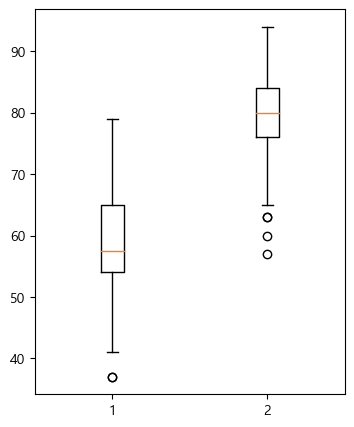

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_name = "C:/Windows/Fonts/malgun.ttf"
font_family = font_manager.FontProperties(fname=font_name).get_name()
plt.rcParams["font.family"] = font_family
plt.rcParams["axes.unicode_minus"] = False

%matplotlib inline

# 여기에 코드를 작성하십시오
fig = plt.figure(figsize=(4,5))
ax = fig.add_subplot(1, 1, 1)

ax.boxplot(df)

plt.show()